<a href="https://colab.research.google.com/github/Thakur-Vishal-Pratap/Data-Science/blob/main/Logistic%20Regression/Project_on_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Thakur-Vishal-Pratap/Data-Science-January/main/Logistic%20Regression/diabetes.csv")

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

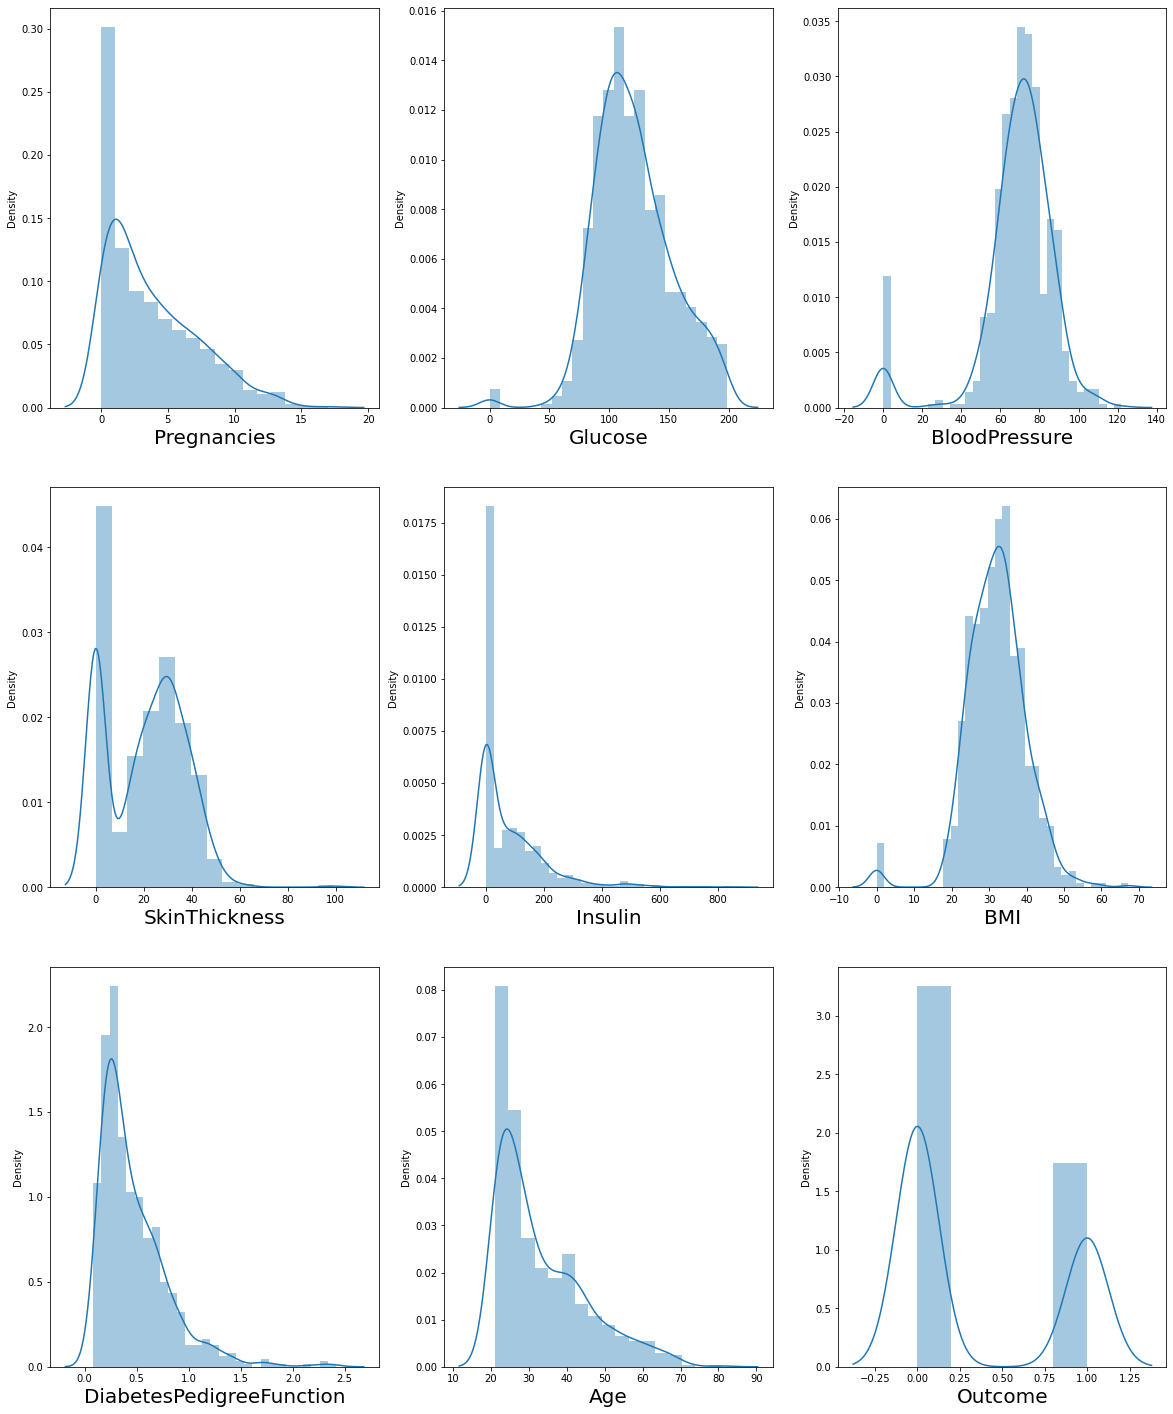

In [11]:
plt.figure(figsize=(20,25) , facecolor='white')
plotnumber = 1

for column in data :
  if plotnumber<=9 :
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column , fontsize=20)
  plotnumber+=1;

plt.show()

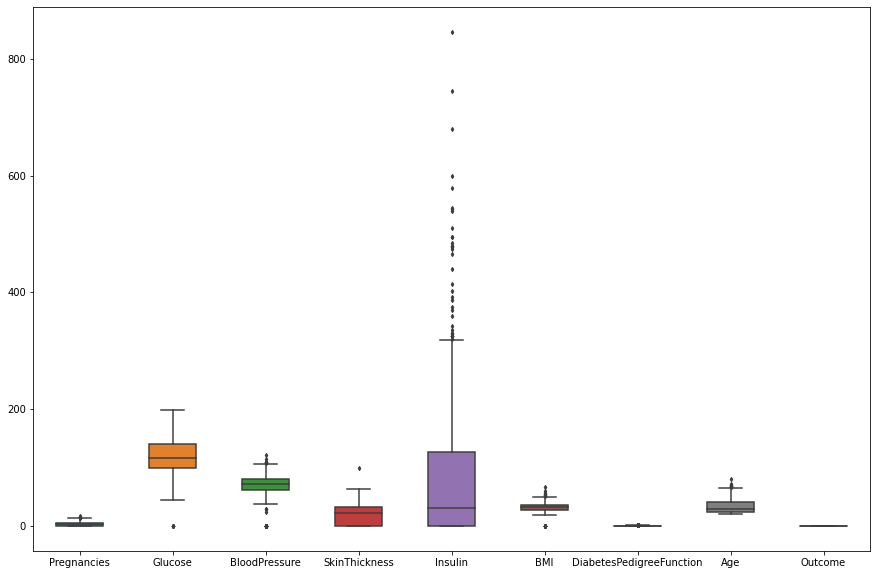

In [12]:
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data , width=0.5 , ax=ax , fliersize=3)

In [19]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

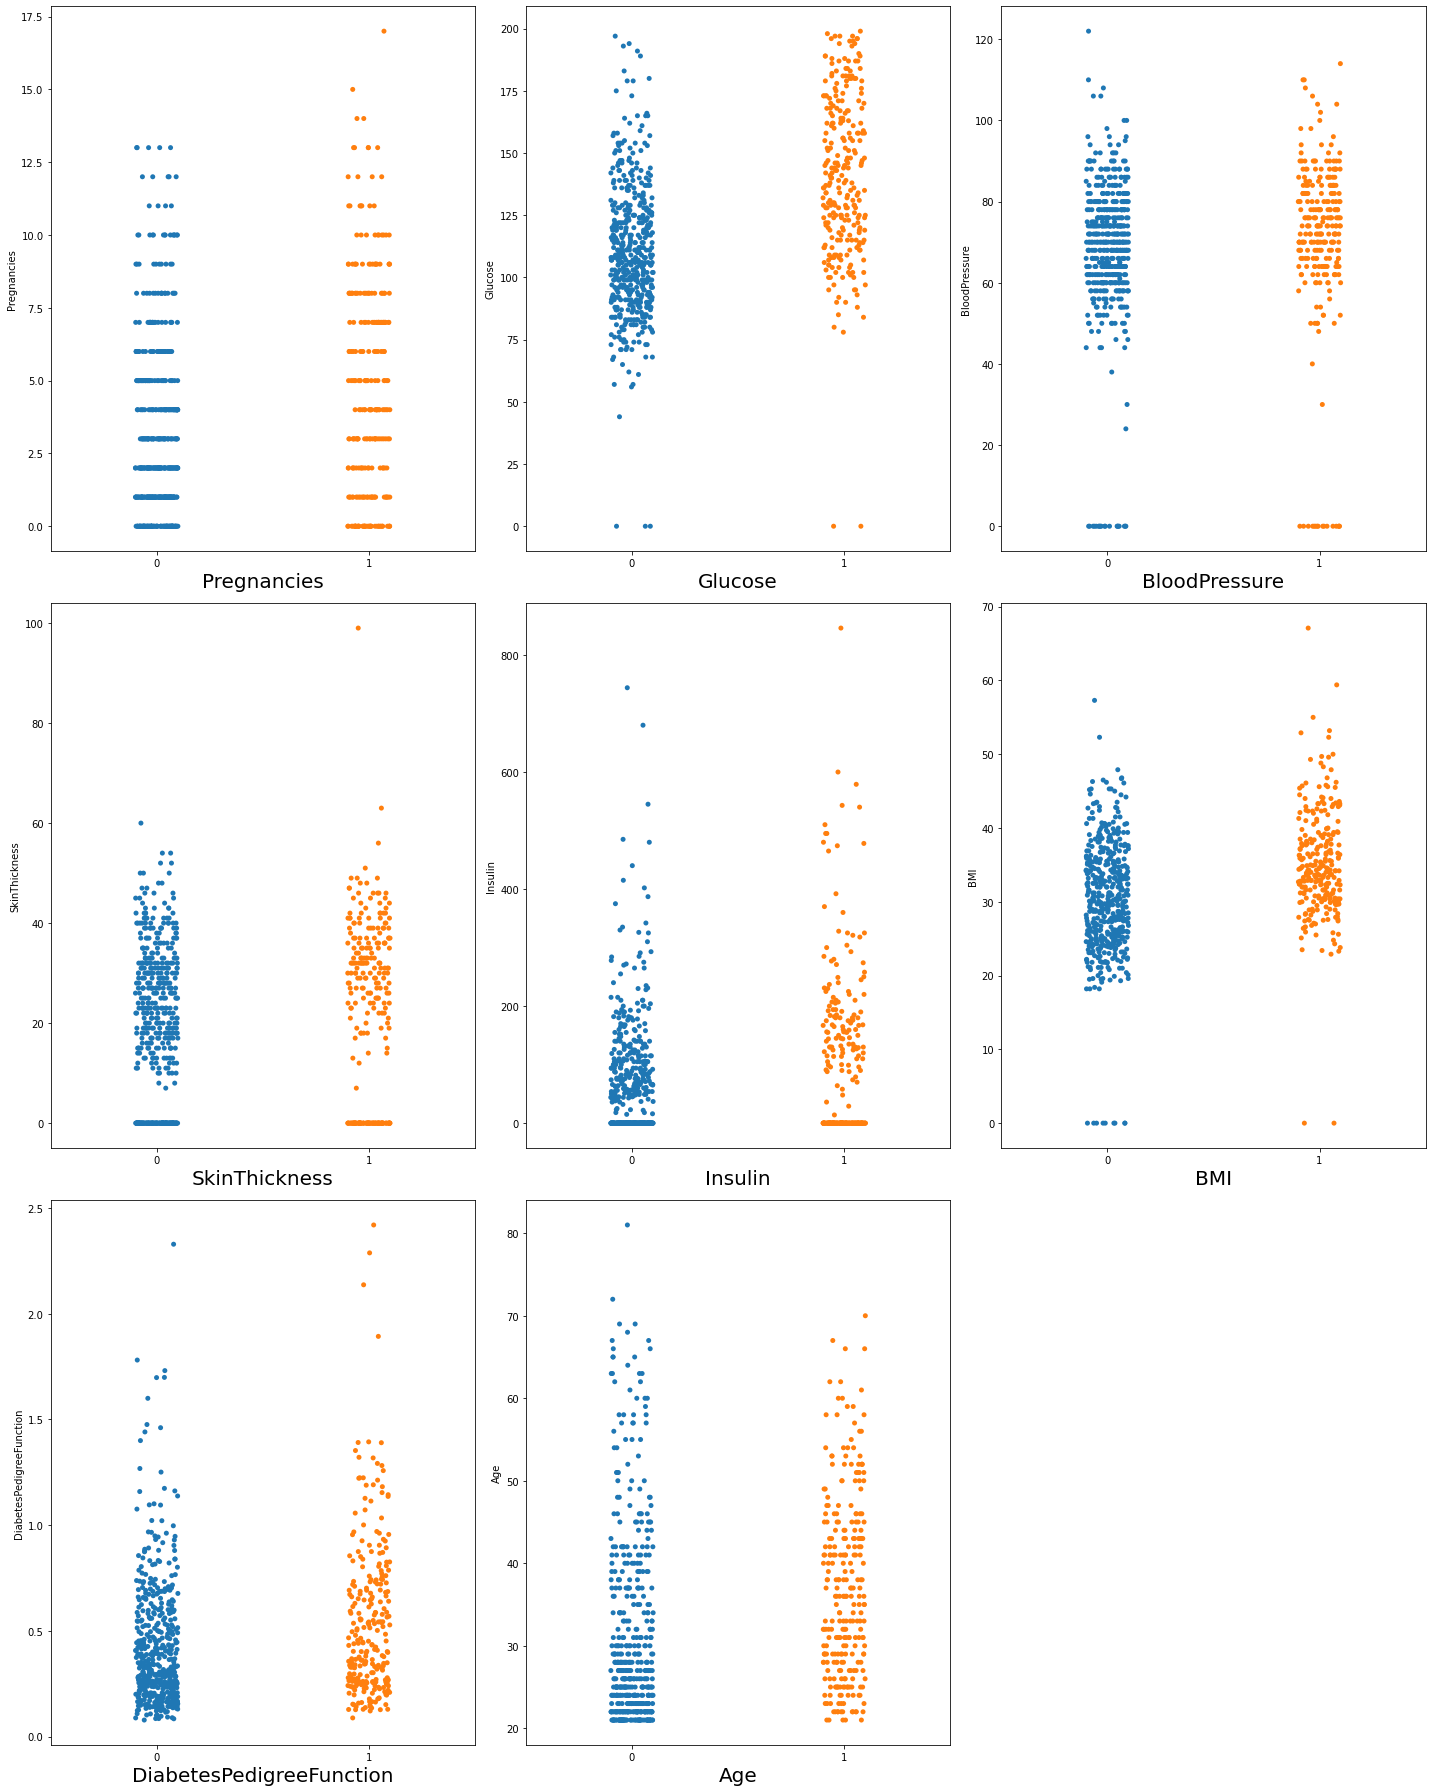

In [18]:
plt.figure(figsize=(20,25) , facecolor='white')
plotnumber = 1

for column in X :
  if plotnumber<=9 :
    ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(y , X[column])
    plt.xlabel(column , fontsize=20)
  plotnumber+=1;

plt.tight_layout()

In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test , Y_train , Y_test = train_test_split(X_scaled , y , test_size=0.33 , random_state=41)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(X_train , Y_train)

LogisticRegression()

In [28]:
model.score(X_test , Y_test)

0.7598425196850394

In [29]:
y_pred = model.predict(X_test)